In [1]:
import os # System set files
from PIL import Image # pip install pillow
import matplotlib.pyplot as plt
import numpy as np
import paddle 
import paddle.fluid as fluid
import time

### Different model

#### fc-sotfmax

In [2]:
def softmax_regression(): # refer to Iris classification
    """
    softmax classifier：
        An fc layer with activation fcn: softmax
    Return:
        predict_image -- result
    """
    # Input original image, size 28*28*1
    # mnist handwritten number，28*28*1 one channel
    # None == -1 unknown, can be any number
    img = fluid.data(name='img', shape=[None, 1, 28, 28], dtype='float32')
    # Output size must be 10 0~9
    # softmax
    # relu、sigmoid、tanh 
    predict = fluid.layers.fc(input=img, size=10, act='softmax') # output 10 
    return predict

#### MLP Multilayer perceptron:

In [3]:
def multilayer_perceptron():
    """
    Define a multi-layer perceptron classifier:
         Multilayer perceptron with two hidden layers (fully connected layers)
         The activation function of the first two hidden layers uses ReLU, and the activation function of the output layer uses Softmax

    Return:
        predict_image -- classification result
    """
    # Input original image, size 28*28*1
    img = fluid.data(name='img', shape=[None, 1, 28, 28], dtype='float32')
    # First fc layer use ReLU
    hidden = fluid.layers.fc(input=img, size=200, act='relu') # 200个神经元，200个方程
    # Second fc layer use ReLU
    hidden = fluid.layers.fc(input=hidden, size=200, act='relu') # 200个神经元，200个方程
    # softmax output, size must be 10
    prediction = fluid.layers.fc(input=hidden, size=10, act='softmax') # 最后一层，输出，10个类别，softmax概率
    return prediction

In [4]:
def conv_pool(input, num_filters, filter_size, pool_size, pool_stride, act="relu"):
    """
    Define the convolutional pooling layer:
         Contains a convolutional layer and a pooling layer
    Args：
        input —— input
        num_filters —— number of the filters/kernels
        filter_size —— kernel size
        pool_size —— pool size
        pool_stride —— pool stride
        act —— activation fcn

    Return:
        out -- output feature image
    """
    conv_out = fluid.layers.conv2d(
        input=input,
        num_filters=num_filters,
        filter_size=filter_size,
        act=act)
    out = fluid.layers.pool2d(
        input=conv_out,
        pool_size=pool_size,
        pool_stride=pool_stride)
    return out
def convolutional_neural_network():
    """
    Define the convolutional neural network classifier:
    The input two-dimensional image passes through two convolution-pooling layers, and uses a fully connected layer with softmax as the activation function as the output layer

    Return:
        predict -- classification result
    """
    # Input original image, size 28*28*1
    img = fluid.data(name='img', shape=[None, 1, 28, 28], dtype='float32')
    # First conv-pooling layer
    # 20 5*5 kernels, pooling size: 2, pooling stride: 2, activation fcn: Relu
    conv_pool_1 = conv_pool(
        input=img,
        filter_size=5,
        num_filters=20,
        pool_size=2,
        pool_stride=2,
        act="relu")
    conv_pool_1 = fluid.layers.batch_norm(conv_pool_1)
    # First conv-pooling layer
    # 50 5*5 kernels, pooling size: 2, pooling stride: 2, activation fcn: Relu
    conv_pool_2 = conv_pool(
        input=conv_pool_1,
        filter_size=5,
        num_filters=50,
        pool_size=2,
        pool_stride=2,
        act="relu")
    # softmax output, size must be 10
    prediction = fluid.layers.fc(input=conv_pool_2, size=10, act='softmax')
    return prediction

### train program

In [5]:
def train_program():
    """
    train_program

    Return:
        predict -- classification result
        avg_cost -- average cost
        acc -- accuracy

    """
    # label,corresponding to the category label of the input picture, the target value, what is the real result of the picture
    label = fluid.data(name='label', shape=[None, 1], dtype='int64')

#     predict result
    predict = softmax_regression() # fc-Softmax
#     predict = multilayer_perceptron() # MTL
#     predict = convolutional_neural_network() # LeNet5

    # Use cross entropy to calculate the cost of predict and label
    cost = fluid.layers.cross_entropy(input=predict, label=label) # matrics [c1,c2,c3]
    # Average cost
    avg_cost = fluid.layers.mean(cost) # Digit number - can be compared
    # Calculate the accuracy
    acc = fluid.layers.accuracy(input=predict, label=label)
    return predict, [avg_cost, acc]

### Optimizer


In [6]:
def optimizer_program():
    # Adam linear regression
    return fluid.optimizer.Adam(learning_rate=0.001)

### Dataset Feeders 

In [7]:
# There are 64 data in a minibatch
BATCH_SIZE = 64 # during training，each have 64 samples in a batch. corresponding to shape=[None]
# Each time 500 data in the training set are read and randomly scrambled, into the batched reader, the batched reader yields 64 data each time
# 50000 overall
train_reader = fluid.io.batch(paddle.reader.shuffle(paddle.dataset.mnist.train(), buf_size=500),# shuffle: random
                              batch_size=BATCH_SIZE) # 6one batch return 64 data
# Read validation set data, yield 64 each time
test_reader = fluid.io.batch(paddle.dataset.mnist.test(), batch_size=BATCH_SIZE)

In [8]:
for train in train_reader():
    print(train[0][0].shape)

(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)

### Visualization

In [9]:
from paddle.utils.plot import Ploter

train_prompt = "Train cost"
test_prompt = "Test cost"
cost_ploter = Ploter(train_prompt, test_prompt)

# Trainning process
def event_handler_plot(ploter_title, step, cost):
    cost_ploter.append(ploter_title, step, cost)
    cost_ploter.plot()

### Define network structure

In [10]:
# CPU/GPU
use_cuda = True # GPU-True, CPU-False
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()

# train_program obtain predicted value and loss
prediction, [avg_loss, acc] = train_program()

# input img, size = 28*28*1
# label same
# feed to the network，img and label
feeder = fluid.DataFeeder(feed_list=['img', 'label'], place=place)

# Optimizer: Adam
optimizer = optimizer_program()
_ = optimizer.minimize(avg_loss)

### Define Hyperparameters


In [11]:
PASS_NUM = 5 # Train for 5
epochs = [epoch_id for epoch_id in range(PASS_NUM)]

# Save the parameters in save_dirname
save_dirname = "recognize_digits.inference.model"

### Loss and Accuracy fcn

In [12]:
def train_test(test_program, # Test
                   train_test_feed, train_test_reader):

    # Save the accuracy in acc_set
    acc_set = []
    # Save the average loss in avg_loss_set
    avg_loss_set = []
    # feed data from reader yield to train
    for test_data in train_test_reader():
        acc_np, avg_loss_np = exe.run(
            program=test_program,
            feed=train_test_feed.feed(test_data), #can use dic or paddle(some api's are provided)
            fetch_list=[acc, avg_loss])
        acc_set.append(float(acc_np))
        avg_loss_set.append(float(avg_loss_np))
    # Obtain the acc and loss from val set
    acc_val_mean = np.array(acc_set).mean()
    avg_loss_val_mean = np.array(avg_loss_set).mean()
    # Return ave loss and acc
    return avg_loss_val_mean, acc_val_mean

### Executor

In [13]:
exe = fluid.Executor(place)
exe.run(fluid.default_startup_program())

[]

### Set main_program and test_program

In [14]:
main_program = fluid.default_main_program()
test_program = fluid.default_main_program().clone(for_test=True)

### Start training

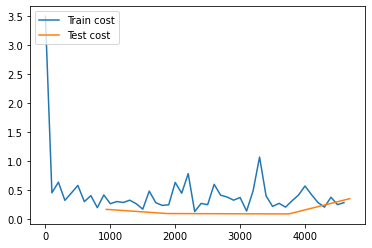

Best pass is 3, testing Avgcost is 0.33122486338778667
The classification accuracy is 90.02%


<Figure size 432x288 with 0 Axes>

In [15]:
lists = []
step = 0
for epoch_id in epochs:
    for step_id, data in enumerate(train_reader()):
        metrics = exe.run(main_program,
                          feed=feeder.feed(data),
                          fetch_list=[avg_loss, acc])
        if step % 100 == 0: #print log for every 100 steps
            print("Pass %d, Batch %d, Cost %f" % (step, epoch_id, metrics[0]))
            event_handler_plot(train_prompt, step, metrics[0])
            
        step += 1

    # Test each classification result in each epoch
    avg_loss_val, acc_val = train_test(test_program=test_program,
                                       train_test_reader=test_reader,
                                       train_test_feed=feeder)

    print("Test with Epoch %d, avg_cost: %s, acc: %s" %(epoch_id, avg_loss_val, acc_val))
    event_handler_plot(test_prompt, step, metrics[0])

    lists.append((epoch_id, avg_loss_val, acc_val))

    # Save the trained model for prediction
    if save_dirname is not None: # save model
        fluid.io.save_inference_model(save_dirname,
                                      ["img"], [prediction], exe,
                                      model_filename=None,
                                      params_filename=None)

# Choose the best pass
best = sorted(lists, key=lambda list: float(list[1]))[0]
print('Best pass is %s, testing Avgcost is %s' % (best[0], best[1]))
print('The classification accuracy is %.2f%%' % (float(best[2]) * 100))

### Apply the model

In [16]:
def load_image(file):
    # Read image, convert to gray
    im = Image.open(file).convert('L')
    # Resize to 28*28
    im = im.resize((28, 28), Image.ANTIALIAS)
    # Change to numpy
    im = np.array(im).reshape(1, 1, 28, 28).astype(np.float32)
    # Data normalization
    im = im/255 * -2 + 1
    return im
cur_dir = os.getcwd()
tensor_img = load_image(cur_dir + '/image/9_1.bmp')

Inference result of image/digit.bmp is: 9


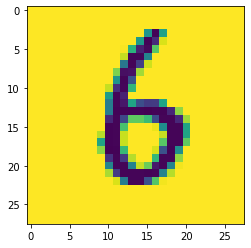

In [17]:
inference_scope = fluid.core.Scope()
with fluid.scope_guard(inference_scope):
    # use fluid.io.load_inference_model 获取 inference program desc,
    # feed_target_names used to set the variable name to input network
    # fetch_targets used to set the variable name fetch from the network
    [inference_program, feed_target_names,
     fetch_targets] = fluid.io.load_inference_model(
     save_dirname, exe, None, None)

    # Set feed to a dic {feed_target_name: feed_target_data}
    # The result will contain a list of data corresponding to fetch_targets
    results = exe.run(inference_program,
                            feed={feed_target_names[0]: tensor_img},
                            fetch_list=fetch_targets)
    lab = np.argsort(results)

    # print the prediction result
    img=Image.open('image/digit.bmp')
    plt.imshow(img)
    print("Inference result of image/digit.bmp is: %d" % lab[0][0][-1])